#### The script is designed to compare four methods of estimating IGE- RDR, BiSEMPGS and PGS-based regression when the data is generated under various conditions of univariate vertical transmission, assortative mating and genetic effects. 

In [16]:
# setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [17]:
# read all the summary statistics
df_sum_SEMPGS = pd.read_csv('/Users/xuly4739/Library/CloudStorage/OneDrive-UCB-O365/Documents/coding/PyProject/StatRev_IndirectGene/Analysis/BiSEMPGS/summary_table.tsv', sep='\t')

df_sum_RDR_Ve = pd.read_csv('/Users/xuly4739/Library/CloudStorage/OneDrive-UCB-O365/Documents/coding/PyProject/StatRev_IndirectGene/Analysis/RDR/three_way_summary_Ve_est.tsv', sep='\t')
df_sum_RDR_VG1 = pd.read_csv('/Users/xuly4739/Library/CloudStorage/OneDrive-UCB-O365/Documents/coding/PyProject/StatRev_IndirectGene/Analysis/RDR/three_way_summary_VG1_est.tsv', sep='\t')
df_sum_RDR_VG2 = pd.read_csv('/Users/xuly4739/Library/CloudStorage/OneDrive-UCB-O365/Documents/coding/PyProject/StatRev_IndirectGene/Analysis/RDR/three_way_summary_VG2_est.tsv', sep='\t')
df_sum_RDR_VG3 = pd.read_csv('/Users/xuly4739/Library/CloudStorage/OneDrive-UCB-O365/Documents/coding/PyProject/StatRev_IndirectGene/Analysis/RDR/three_way_summary_VG3_est.tsv', sep='\t')
df_sum_RDR_Vp = pd.read_csv('/Users/xuly4739/Library/CloudStorage/OneDrive-UCB-O365/Documents/coding/PyProject/StatRev_IndirectGene/Analysis/RDR/three_way_summary_Vp_est.tsv', sep='\t')

df_sum_kong_trait1 = pd.read_csv('/Users/xuly4739/Library/CloudStorage/OneDrive-UCB-O365/Documents/coding/PyProject/StatRev_IndirectGene/Analysis/PGS-Regression/results/regression_trait1_kong_r2_summary_stats.tsv', sep='\t')
df_sum_kong_trait2 = pd.read_csv('/Users/xuly4739/Library/CloudStorage/OneDrive-UCB-O365/Documents/coding/PyProject/StatRev_IndirectGene/Analysis/PGS-Regression/results/regression_trait2_kong_r2_summary_stats.tsv', sep='\t')
df_sum_fullrgs_trait1 = pd.read_csv('/Users/xuly4739/Library/CloudStorage/OneDrive-UCB-O365/Documents/coding/PyProject/StatRev_IndirectGene/Analysis/PGS-Regression/results/regression_trait1_full_pgs_r2_summary_stats.tsv', sep='\t')
df_sum_fullrgs_trait2 = pd.read_csv('/Users/xuly4739/Library/CloudStorage/OneDrive-UCB-O365/Documents/coding/PyProject/StatRev_IndirectGene/Analysis/PGS-Regression/results/regression_trait2_full_pgs_r2_summary_stats.tsv', sep='\t')

#### First we will compare full PGS regression, haplotypic PGS regression and SEM-PGS's estimate on the proportion of variance explained by indirect genetic effects. 

In [18]:
# first obtain the proportion of variance explained by indirect genetic effects from SEM-PGS
# create a named vector to store the results
sem_pgs_ige_results = {}
onlyPheVT_idx_ige = (df_sum_SEMPGS['condition'] == '01_t1pheVTnoAM_t2socVTnoAM') & (df_sum_SEMPGS['variable'] == 'phi11')
onlyPheVT_idx_VY  = (df_sum_SEMPGS['condition'] == '01_t1pheVTnoAM_t2socVTnoAM') & (df_sum_SEMPGS['variable'] == 'VY11')
sem_pgs_ige_results['onlyVT'] = df_sum_SEMPGS.loc[onlyPheVT_idx_ige, 'median'].values[0] / df_sum_SEMPGS.loc[onlyPheVT_idx_VY, 'median'].values[0]

onlySocVT_idx_ige = (df_sum_SEMPGS['condition'] == '01_t1pheVTnoAM_t2socVTnoAM') & (df_sum_SEMPGS['variable'] == 'phi22')
onlySocVT_idx_VY  = (df_sum_SEMPGS['condition'] == '01_t1pheVTnoAM_t2socVTnoAM') & (df_sum_SEMPGS['variable'] == 'VY22')
sem_pgs_ige_results['onlySocVT'] = df_sum_SEMPGS.loc[onlySocVT_idx_ige, 'median'].values[0] / df_sum_SEMPGS.loc[onlySocVT_idx_VY, 'median'].values[0]

onlyPheAM_idx_ige = (df_sum_SEMPGS['condition'] == '02_t1noVTpheAM_t2noVTnooAM') & (df_sum_SEMPGS['variable'] == 'phi11')
onlyPheAM_idx_VY  = (df_sum_SEMPGS['condition'] == '02_t1noVTpheAM_t2noVTnooAM') & (df_sum_SEMPGS['variable'] == 'VY11')
sem_pgs_ige_results['onlyPheAM'] = df_sum_SEMPGS.loc[onlyPheAM_idx_ige, 'median'].values[0] / df_sum_SEMPGS.loc[onlyPheAM_idx_VY, 'median'].values[0]

noVTnoAM_idx_ige = (df_sum_SEMPGS['condition'] == '02_t1noVTpheAM_t2noVTnooAM') & (df_sum_SEMPGS['variable'] == 'phi22')
noVTnoAM_idx_VY  = (df_sum_SEMPGS['condition'] == '02_t1noVTpheAM_t2noVTnooAM') & (df_sum_SEMPGS['variable'] == 'VY22')
sem_pgs_ige_results['noVTnoAM'] = df_sum_SEMPGS.loc[noVTnoAM_idx_ige, 'median'].values[0] / df_sum_SEMPGS.loc[noVTnoAM_idx_VY, 'median'].values[0]

pheAMpheVT_idx_ige = (df_sum_SEMPGS['condition'] == 't1pheVT_t2socVT_uniphenoAM') & (df_sum_SEMPGS['variable'] == 'phi11')
pheAMpheVT_idx_VY  = (df_sum_SEMPGS['condition'] == 't1pheVT_t2socVT_uniphenoAM') & (df_sum_SEMPGS['variable'] == 'VY11')
sem_pgs_ige_results['pheAMpheVT'] = df_sum_SEMPGS.loc[pheAMpheVT_idx_ige, 'median'].values[0] / df_sum_SEMPGS.loc[pheAMpheVT_idx_VY, 'median'].values[0]

pheAMsocVT_idx_ige = (df_sum_SEMPGS['condition'] == 't1pheVT_t2socVT_uniphenoAM') & (df_sum_SEMPGS['variable'] == 'phi22')
pheAMsocVT_idx_VY  = (df_sum_SEMPGS['condition'] == 't1pheVT_t2socVT_uniphenoAM') & (df_sum_SEMPGS['variable'] == 'VY22')
sem_pgs_ige_results['pheAMsocVT'] = df_sum_SEMPGS.loc[pheAMsocVT_idx_ige, 'median'].values[0] / df_sum_SEMPGS.loc[pheAMsocVT_idx_VY, 'median'].values[0]

print("\nSEM-PGS: proportion of variance explained by indirect genetic effects\n")
df_sem = (
    pd.Series(sem_pgs_ige_results, name="Proportion")
      .reset_index()
      .rename(columns={"index": "Condition"})
)
# print as a neat table, four decimals
print(df_sem.to_string(index=False, float_format="%.4f"))


SEM-PGS: proportion of variance explained by indirect genetic effects

 Condition  Proportion
    onlyVT      0.0295
 onlySocVT      0.0011
 onlyPheAM      0.0006
  noVTnoAM      0.0013
pheAMpheVT      0.0162
pheAMsocVT      0.0002


In [19]:
# get the proportion of variance explained by indirect genetic effects from full PGS regression
fullrgs_ige_results = {}
kong_ige_results = {}

fullrgs_onlyPheVT_idx_totalR2 = (df_sum_fullrgs_trait1['condition'] == '01_t1pheVTnoAM_t2socVTnoAM') & (df_sum_fullrgs_trait1['variable'] == 'total_r2_PGSm1')
fullrgs_onlyPheVT_idx_dirR2 = (df_sum_fullrgs_trait1['condition'] == '01_t1pheVTnoAM_t2socVTnoAM') & (df_sum_fullrgs_trait1['variable'] == 'total_r2_PGSo1')
fullrgs_ige_results['onlyVT'] = df_sum_fullrgs_trait1.loc[fullrgs_onlyPheVT_idx_totalR2, 'median'].values[0] - df_sum_fullrgs_trait1.loc[fullrgs_onlyPheVT_idx_dirR2, 'median'].values[0]

fullrgs_onlySocVT_idx_totalR2 = (df_sum_fullrgs_trait2['condition'] == '01_t1pheVTnoAM_t2socVTnoAM') & (df_sum_fullrgs_trait2['variable'] == 'total_r2_PGSm2')
fullrgs_onlySocVT_idx_dirR2 = (df_sum_fullrgs_trait2['condition'] == '01_t1pheVTnoAM_t2socVTnoAM') & (df_sum_fullrgs_trait2['variable'] == 'total_r2_PGSo2')
fullrgs_ige_results['onlySocVT'] = df_sum_fullrgs_trait2.loc[fullrgs_onlySocVT_idx_totalR2, 'median'].values[0] - df_sum_fullrgs_trait2.loc[fullrgs_onlySocVT_idx_dirR2, 'median'].values[0]

fullrgs_onlyPheAM_idx_totalR2 = (df_sum_fullrgs_trait1['condition'] == '02_t1noVTpheAM_t2noVTnoAM') & (df_sum_fullrgs_trait1['variable'] == 'total_r2_PGSm1')
fullrgs_onlyPheAM_idx_dirR2 = (df_sum_fullrgs_trait1['condition'] == '02_t1noVTpheAM_t2noVTnoAM') & (df_sum_fullrgs_trait1['variable'] == 'total_r2_PGSo1')
fullrgs_ige_results['onlyPheAM'] = df_sum_fullrgs_trait1.loc[fullrgs_onlyPheAM_idx_totalR2, 'median'].values[0] - df_sum_fullrgs_trait1.loc[fullrgs_onlyPheAM_idx_dirR2, 'median'].values[0]

fullrgs_noVTnoAM_idx_totalR2 = (df_sum_fullrgs_trait2['condition'] == '02_t1noVTpheAM_t2noVTnoAM') & (df_sum_fullrgs_trait2['variable'] == 'total_r2_PGSm2')
fullrgs_noVTnoAM_idx_dirR2 = (df_sum_fullrgs_trait2['condition'] == '02_t1noVTpheAM_t2noVTnoAM') & (df_sum_fullrgs_trait2['variable'] == 'total_r2_PGSo2')
fullrgs_ige_results['noVTnoAM'] = df_sum_fullrgs_trait2.loc[fullrgs_noVTnoAM_idx_totalR2, 'median'].values[0] - df_sum_fullrgs_trait2.loc[fullrgs_noVTnoAM_idx_dirR2, 'median'].values[0]

fullrgs_pheAMpheVT_idx_totalR2 = (df_sum_fullrgs_trait1['condition'] == 't1pheVT_t2socVT_uniphenoAM') & (df_sum_fullrgs_trait1['variable'] == 'total_r2_PGSm1')
fullrgs_pheAMpheVT_idx_dirR2 = (df_sum_fullrgs_trait1['condition'] == 't1pheVT_t2socVT_uniphenoAM') & (df_sum_fullrgs_trait1['variable'] == 'total_r2_PGSo1')
fullrgs_ige_results['pheAMpheVT'] = df_sum_fullrgs_trait1.loc[fullrgs_pheAMpheVT_idx_totalR2, 'median'].values[0] - df_sum_fullrgs_trait1.loc[fullrgs_pheAMpheVT_idx_dirR2, 'median'].values[0]

fullrgs_pheAMsocVT_idx_totalR2 = (df_sum_fullrgs_trait2['condition'] == 't1pheVT_t2socVT_uniphenoAM') & (df_sum_fullrgs_trait2['variable'] == 'total_r2_PGSm2')
fullrgs_pheAMsocVT_idx_dirR2 = (df_sum_fullrgs_trait2['condition'] == 't1pheVT_t2socVT_uniphenoAM') & (df_sum_fullrgs_trait2['variable'] == 'total_r2_PGSo2')
fullrgs_ige_results['pheAMsocVT'] = df_sum_fullrgs_trait2.loc[fullrgs_pheAMsocVT_idx_totalR2, 'median'].values[0] - df_sum_fullrgs_trait2.loc[fullrgs_pheAMsocVT_idx_dirR2, 'median'].values[0]

print("\nFull PGS regression: proportion of variance explained by indirect genetic effects\n")
df_fullrgs = (
    pd.Series(fullrgs_ige_results, name="Proportion")
      .reset_index()
      .rename(columns={"index": "Condition"})
)
# print as a neat table, four decimals
print(df_fullrgs.to_string(index=False, float_format="%.4f"))

                                                                                                                                        
                                                                                                                            


Full PGS regression: proportion of variance explained by indirect genetic effects

 Condition  Proportion
    onlyVT      0.0301
 onlySocVT      0.0002
 onlyPheAM      0.0122
  noVTnoAM      0.0003
pheAMpheVT      0.0693
pheAMsocVT      0.0119


In [20]:
# get the proportion of variance explained by indirect genetic effects from Kong (haplotypic) PGS regression
kong_onlyPheVT_idx_totalR2 = (df_sum_kong_trait1['condition'] == '01_t1pheVTnoAM_t2socVTnoAM') & (df_sum_kong_trait1['variable'] == 'total_r2_NTp1')
kong_ige_results['onlyVT'] = df_sum_kong_trait1.loc[kong_onlyPheVT_idx_totalR2, 'median'].values[0]

kong_onlySocVT_idx_totalR2 = (df_sum_kong_trait2['condition'] == '01_t1pheVTnoAM_t2socVTnoAM') & (df_sum_kong_trait2['variable'] == 'total_r2_NTp2')
kong_ige_results['onlySocVT'] = df_sum_kong_trait2.loc[kong_onlySocVT_idx_totalR2, 'median'].values[0]

kong_onlyPheAM_idx_totalR2 = (df_sum_kong_trait1['condition'] == '02_t1noVTpheAM_t2noVTnoAM') & (df_sum_kong_trait1['variable'] == 'total_r2_NTp1')
kong_ige_results['onlyPheAM'] = df_sum_kong_trait1.loc[kong_onlyPheAM_idx_totalR2, 'median'].values[0]

kong_noVTnoAM_idx_totalR2 = (df_sum_kong_trait2['condition'] == '02_t1noVTpheAM_t2noVTnoAM') & (df_sum_kong_trait2['variable'] == 'total_r2_NTp2')
kong_ige_results['noVTnoAM'] = df_sum_kong_trait2.loc[kong_noVTnoAM_idx_totalR2, 'median'].values[0]

kong_pheAMpheVT_idx_totalR2 = (df_sum_kong_trait1['condition'] == 't1pheVT_t2socVT_uniphenoAM') & (df_sum_kong_trait1['variable'] == 'total_r2_NTp1')
kong_ige_results['pheAMpheVT'] = df_sum_kong_trait1.loc[kong_pheAMpheVT_idx_totalR2, 'median'].values[0]

kong_pheAMsocVT_idx_totalR2 = (df_sum_kong_trait2['condition'] == 't1pheVT_t2socVT_uniphenoAM') & (df_sum_kong_trait2['variable'] == 'total_r2_NTp2')
kong_ige_results['pheAMsocVT'] = df_sum_kong_trait2.loc[kong_pheAMsocVT_idx_totalR2, 'median'].values[0]


print("\nKong (haplotypic) PGS regression: proportion of variance explained by indirect genetic effects\n")
df_kong = (
    pd.Series(kong_ige_results, name="Proportion")
      .reset_index()
      .rename(columns={"index": "Condition"})
)
# print as a neat table, four decimals
print(df_kong.to_string(index=False, float_format="%.4f"))


Kong (haplotypic) PGS regression: proportion of variance explained by indirect genetic effects

 Condition  Proportion
    onlyVT      0.0298
 onlySocVT      0.0002
 onlyPheAM      0.0402
  noVTnoAM      0.0002
pheAMpheVT      0.1071
pheAMsocVT      0.0194


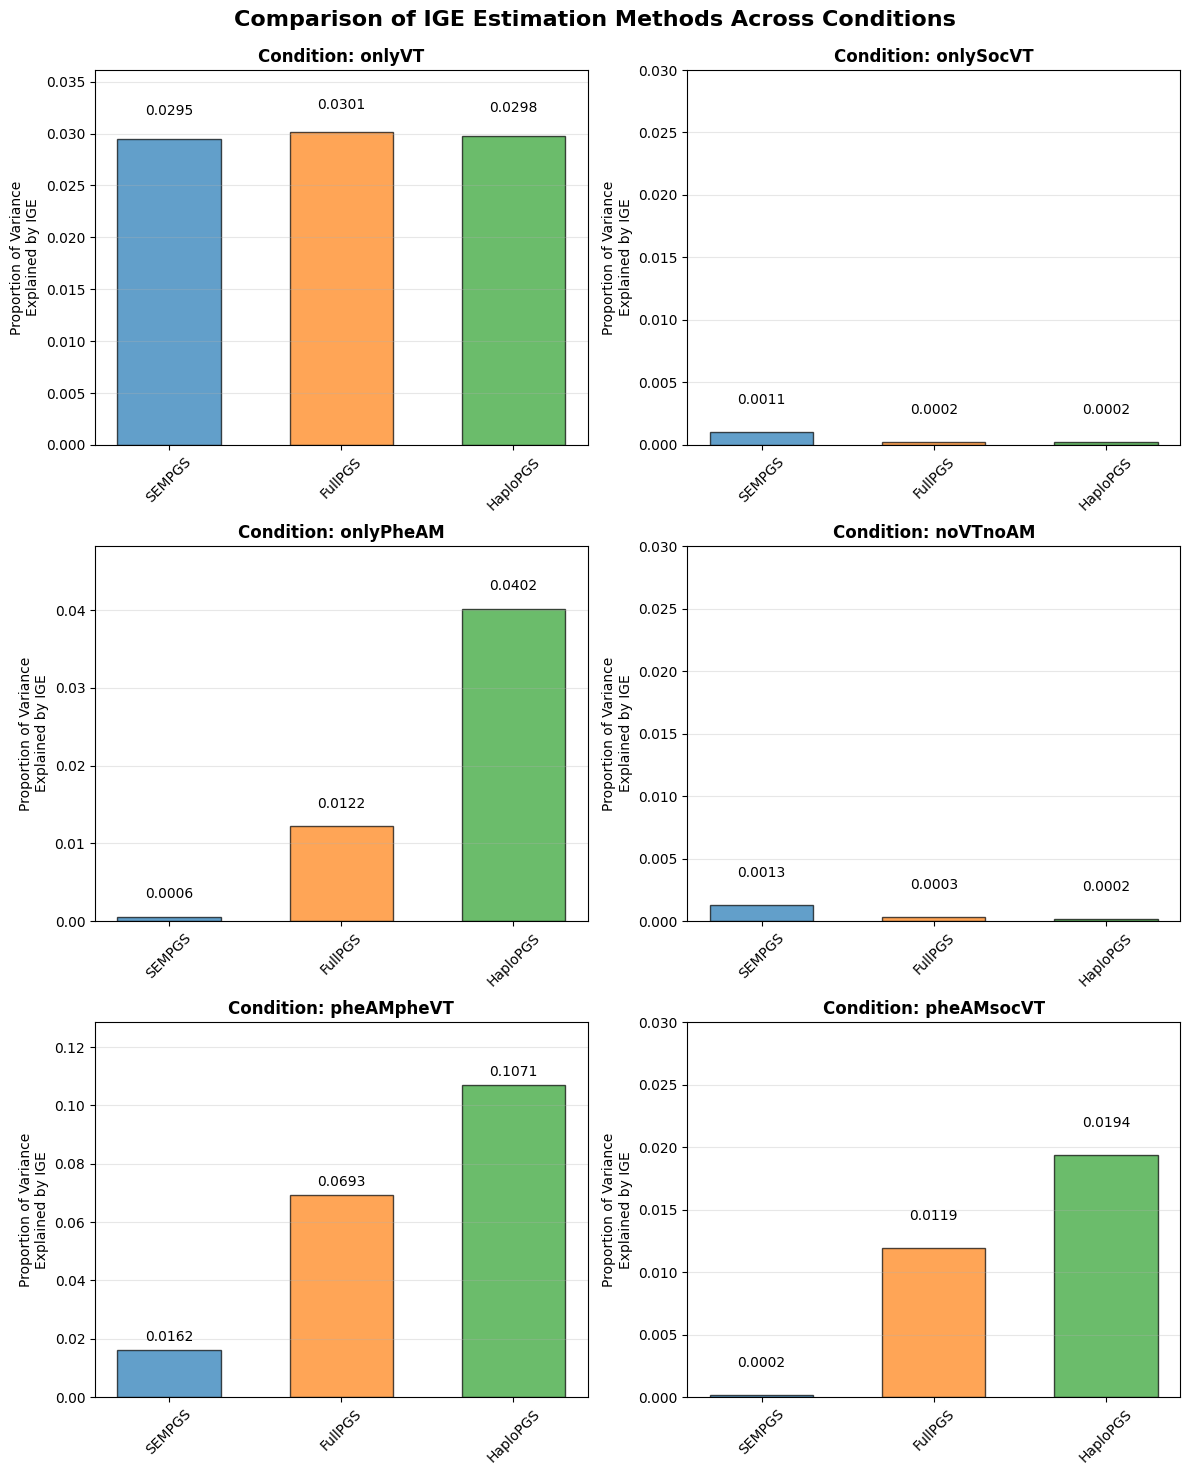

In [21]:
# Create a 3x2 grid of bar plots comparing the three methods for each condition
fig, axes = plt.subplots(3, 2, figsize=(12, 15))
axes = axes.flatten()

# Get all conditions
conditions = list(sem_pgs_ige_results.keys())

# Colors for each method with shorter names
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
method_names = ['SEMPGS', 'FullPGS', 'HaploPGS']  # Updated to shorter names

# Create bar plots for each condition
for i, condition in enumerate(conditions):
    ax = axes[i]
    
    # Get values for each method
    values = [
        sem_pgs_ige_results[condition],
        fullrgs_ige_results[condition], 
        kong_ige_results[condition]
    ]
    
    # Create bar plot with width parameter to ensure proper spacing
    bars = ax.bar(method_names, values, color=colors, alpha=0.7, 
                 edgecolor='black', linewidth=1, width=0.6)
    
    # Add value labels on top of bars with adjusted position
    for bar, value in zip(bars, values):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.002,
                f'{value:.4f}', ha='center', va='bottom', fontsize=10)
    
    # Customize plot
    ax.set_title(f'Condition: {condition}', fontsize=12, fontweight='bold')
    ax.set_ylabel('Proportion of Variance\nExplained by IGE', fontsize=10)
    ax.set_ylim(0, max(max(values) * 1.2, 0.03))  # Ensure minimum y-limit of 0.03
    ax.grid(True, alpha=0.3, axis='y')
    ax.tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.suptitle('Comparison of IGE Estimation Methods Across Conditions', 
             fontsize=16, fontweight='bold', y=0.98)
plt.subplots_adjust(top=0.94)

plt.show()